# Imports

In [91]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [92]:
df = pd.read_csv('../dados/github_repos_limpo.csv')
df.head(2)

,name,owner,stars,forks,language,created_at,updated_at,size_kb,open_issues,owner_type,owner_public_repos,subscribers_count,last_year_commits,contributors,closed_issues,pull_requests
0,free-programming-books,EbookFoundation,359735,63576,Python,2013-10-11 06:50:37+00:00,2025-06-21 02:09:07+00:00,19483,45,Organization,37,5000,339,432,129,15
1,public-apis,public-apis,351991,37004,Python,2016-03-20 23:49:42+00:00,2025-06-21 02:06:40+00:00,4771,492,Organization,1,4316,5,427,159,490


In [93]:
df_reduzido = df[(df['stars'] <= 150000) & (df['forks'] <= 20000) & (df['language'].isin(['Python', 'TypeScript', 'JavaScript']))]
df_reduzido['language'].value_counts()

language
JavaScript    988
TypeScript    988
Python        984
Name: count, dtype: int64

## Correlação Entre Dados

## Modelos

### Regressão

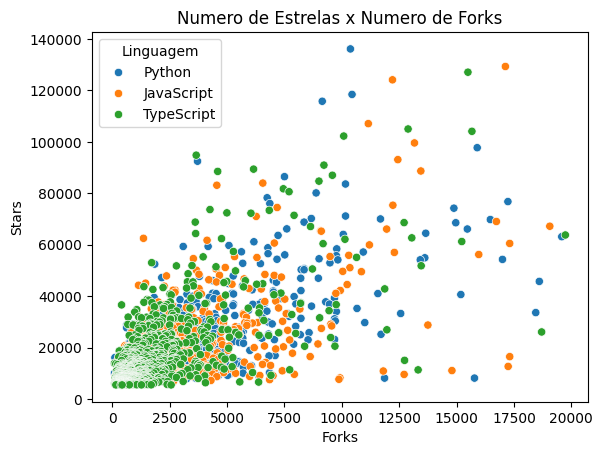

In [94]:
sns.scatterplot(data=df_reduzido, x="forks", y="stars", hue="language")
plt.title("Numero de Estrelas x Numero de Forks")
plt.xlabel("Forks")
plt.ylabel("Stars")
plt.legend(title="Linguagem")
plt.show()

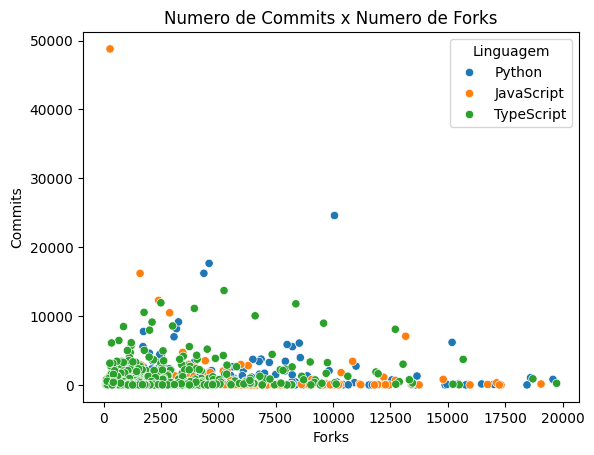

In [95]:
sns.scatterplot(data=df_reduzido, x="forks", y="last_year_commits", hue="language")
plt.title("Numero de Commits x Numero de Forks")
plt.xlabel("Forks")
plt.ylabel("Commits")
plt.legend(title="Linguagem")
plt.show()

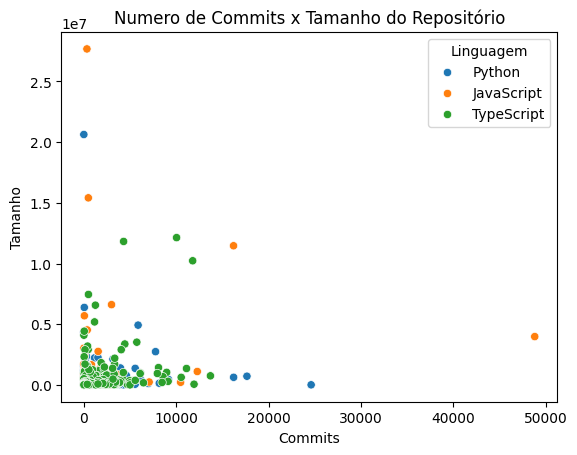

In [96]:
sns.scatterplot(data=df_reduzido, x="last_year_commits", y="size_kb", hue="language")
plt.title("Numero de Commits x Tamanho do Repositório")
plt.xlabel("Commits")
plt.ylabel("Tamanho")
plt.legend(title="Linguagem")
plt.show()

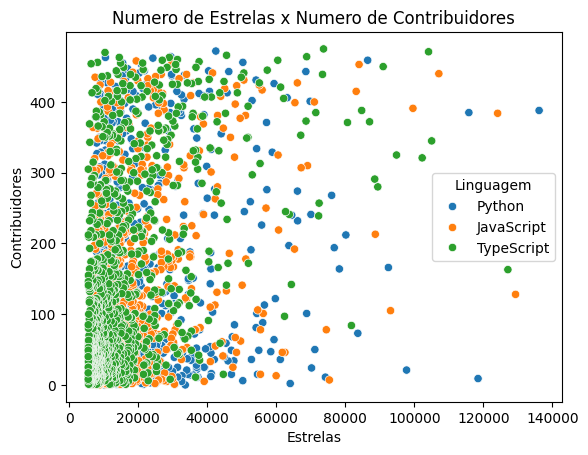

In [97]:
sns.scatterplot(data=df_reduzido, x="stars", y="contributors", hue="language")
plt.title("Numero de Estrelas x Numero de Contribuidores")
plt.xlabel("Estrelas")
plt.ylabel("Contribuidores")
plt.legend(title="Linguagem")
plt.show()

In [105]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# remover valores nulos
df_reg = df_reduzido[["forks", "stars", "language", "contributors", "pull_requests"]].dropna()

# variáveis independentes e dependentes
X = df_reg[["forks"]]
y = df_reg["stars"]

# separar em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# criar e treinar o modelo
model = LinearRegression()
model.fit(X_train, y_train)

# avaliação do modelo
r2 = model.score(X_test, y_test)
print(f"Coeficiente de determinação R²: {r2:.2f}")
print(f"Coeficiente angular: {model.coef_[0]:.2f}, Intercepto: {model.intercept_:.2f}")

Coeficiente de determinação R²: 0.44
Coeficiente angular: 3.85, Intercepto: 8200.11


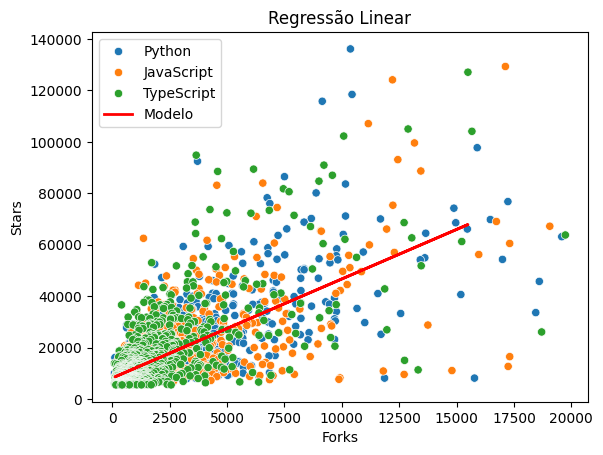

In [99]:
# previsão
y_pred = model.predict(X_test)

# gráfico
sns.scatterplot(data=df_reg, x="forks", y="stars", hue="language")
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Modelo")
plt.xlabel("Forks")
plt.ylabel("Stars")
plt.title("Regressão Linear")
plt.legend()
plt.show()

### Classificação

              precision    recall  f1-score   support

  JavaScript       0.31      0.47      0.37       230
      Python       0.45      0.18      0.26       254
  TypeScript       0.43      0.48      0.46       256

    accuracy                           0.38       740
   macro avg       0.40      0.38      0.36       740
weighted avg       0.40      0.38      0.36       740



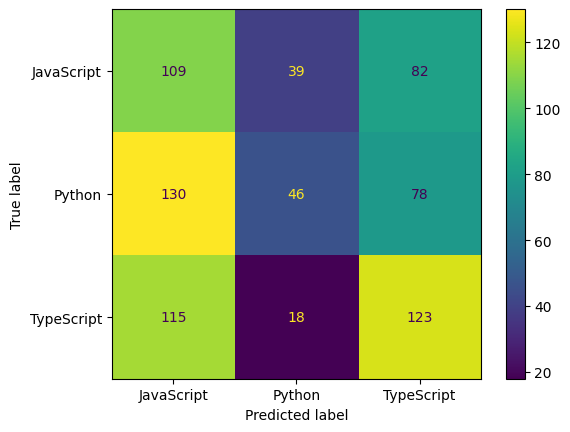

In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, ConfusionMatrixDisplay


X = df_reg[["forks", "stars", "contributors", "pull_requests"]]
y = df_reg["language"]

# normalizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# separar conjuntos
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

# treinar o modelo de classificação
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# avaliar
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

# matriz de confusão
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
plt.show()

              precision    recall  f1-score   support

  JavaScript       0.27      0.21      0.24       230
      Python       0.52      0.26      0.35       254
  TypeScript       0.42      0.70      0.52       256

    accuracy                           0.40       740
   macro avg       0.40      0.39      0.37       740
weighted avg       0.40      0.40      0.37       740



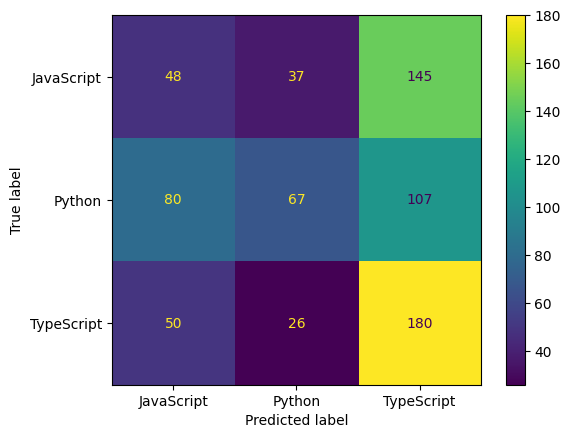

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, ConfusionMatrixDisplay


X = df_reg[["forks", "stars"]]
y = df_reg["language"]

# normalizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# separar conjuntos
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

# treinar o modelo de classificação
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# avaliar
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

# matriz de confusão
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)
plt.show()